In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
plt.style.use('../config/paper_protein_content.mplstyle')

In [3]:
db_human = pd.read_excel('../data/hela/human_db_mass.xlsx')

In [4]:
articles_names = ['nagaraj2011', 'wisniewski2012', 'kulak2014', 'itzhak2016', 'bekker-jensen2017']
articles_data =  [pd.read_excel(f'../data/hela/processed/{i}_processed.xlsx') for i in articles_names]
articles_data = [i.drop_duplicates('Entry') for i in articles_data] #???

In [5]:
total_proteins_quantified = [len(i) for i in articles_data]
total_proteins_quantified

[8019, 7628, 9207, 8512, 12109]

In [6]:
total_proteins_quantified2 = [len(i.drop_duplicates('Entry')) for i in articles_data]
total_proteins_quantified2

[8019, 7628, 9207, 8512, 12109]

In [7]:
core_proteins = set.intersection(*[set(i['Entry'].tolist()) for i in articles_data])
len(core_proteins)

6243

In [8]:
len(core_proteins)

6243

In [9]:
cn_total = [i['C [Copies/cell]'].sum() for i in articles_data]
cn_total

[1960478092.3373165,
 8100529154.736322,
 2929814776.83667,
 7760889579.805689,
 4007991334.276183]

In [10]:
cn_total_per_um = [i/2800 for i in cn_total]
cn_total_per_um

[700170.7472633274,
 2893046.1266915435,
 1046362.4202988107,
 2771746.2785020317,
 1431425.4765272082]

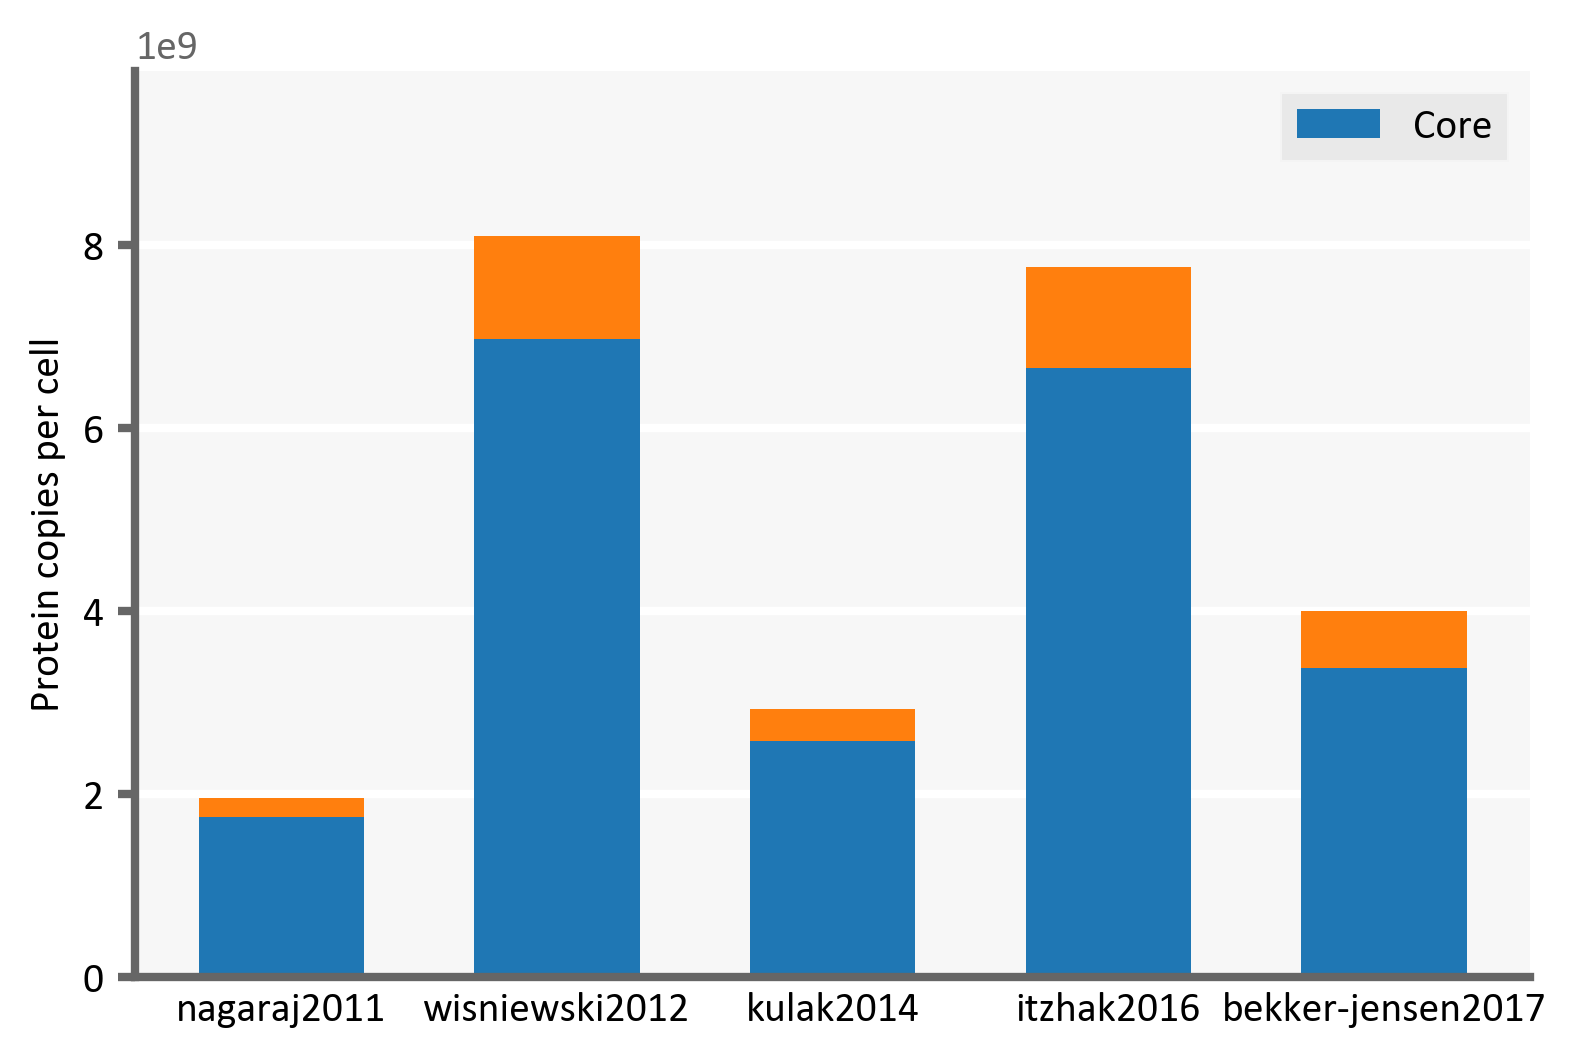

In [11]:
fig, ax = plt.subplots(figsize=(6,4))

ax.set(xticks = range(len(articles_data)),
       xticklabels = articles_names,
       ylabel = 'Protein copies per cell',
       ylim = [0, 9.9e+9])

ax.bar(range(len(articles_data)), 
       height = [i['C [Copies/cell]'].sum() for i in articles_data], 
       color = 'C1',
       width = 0.6)

ax.bar(range(len(articles_data)), 
       height = [i[i['Entry'].isin(core_proteins)]['C [Copies/cell]'].sum() for i in articles_data], 
       color = 'C0',
       label = 'Core',
       width = 0.6)

ax.legend()

plt.savefig('../graphs/hela_total_cn_with_core.png')

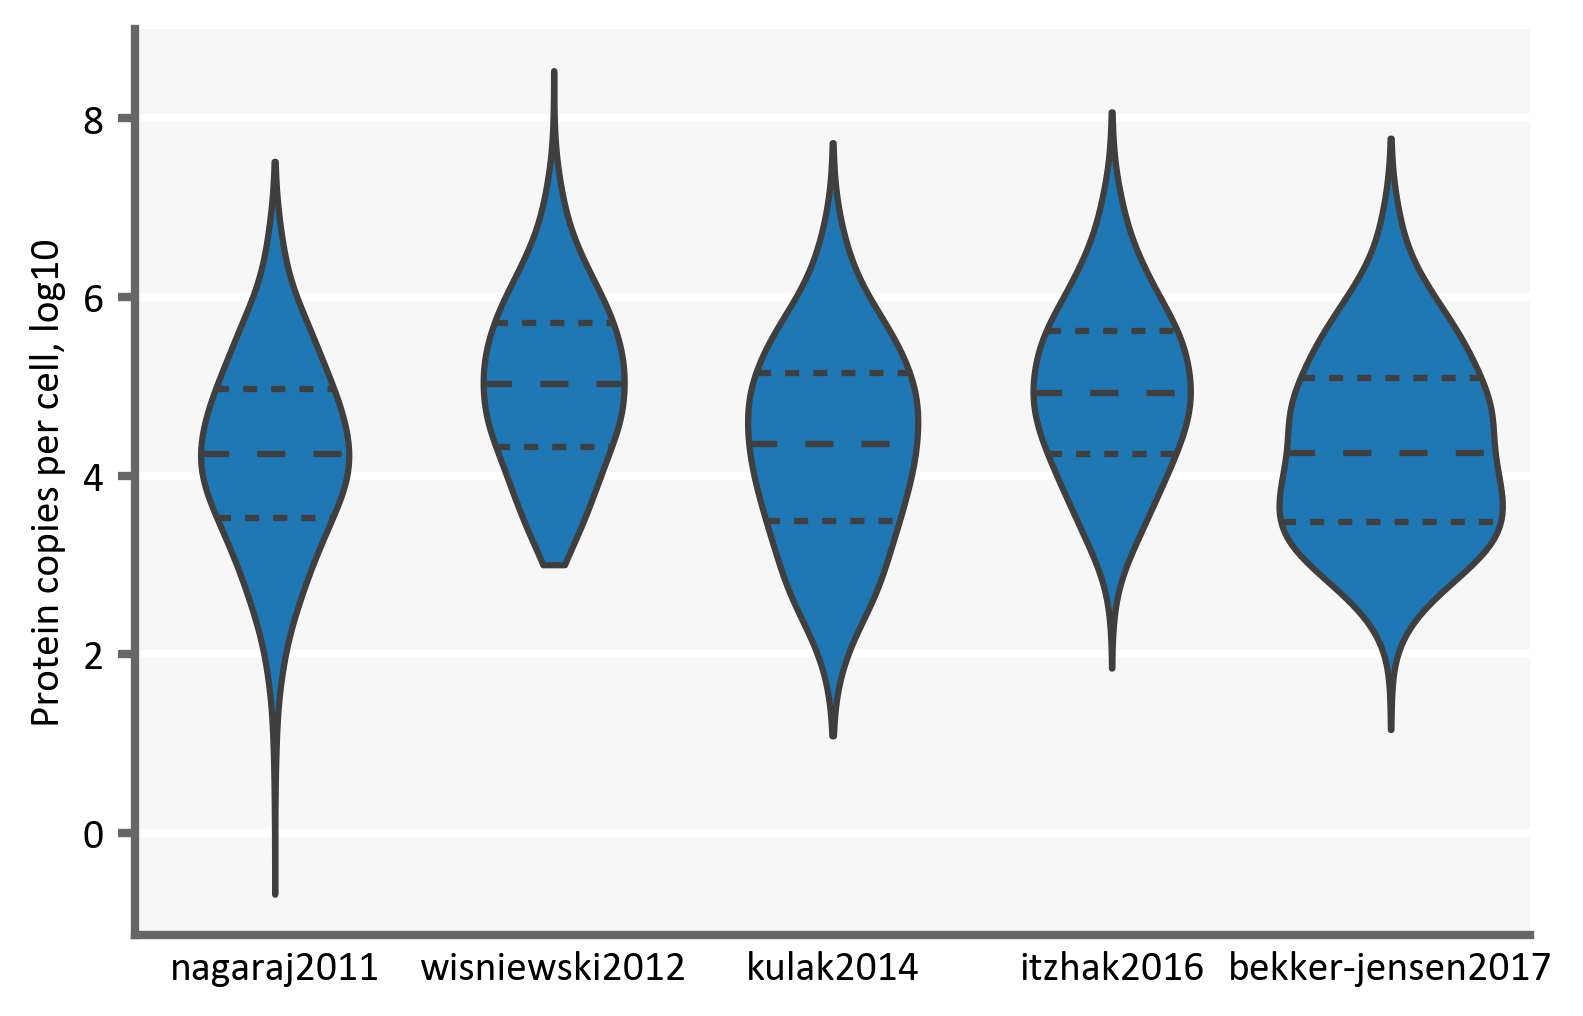

In [10]:
plt.figure(figsize=(6,4))

sn.violinplot(data = [np.log10(i['C [Copies/cell]'].to_numpy()) for i in articles_data],
              inner = 'quartiles',
              cut = 0, 
              scale = 'count', 
              bw = 0.3,
              color = 'C0',
              saturation = 1)

plt.ylabel('Protein copies per cell, log10')
plt.xticks(range(len(articles_names)), articles_names)

plt.savefig('../graphs/hela_cn_dist_violin.png')

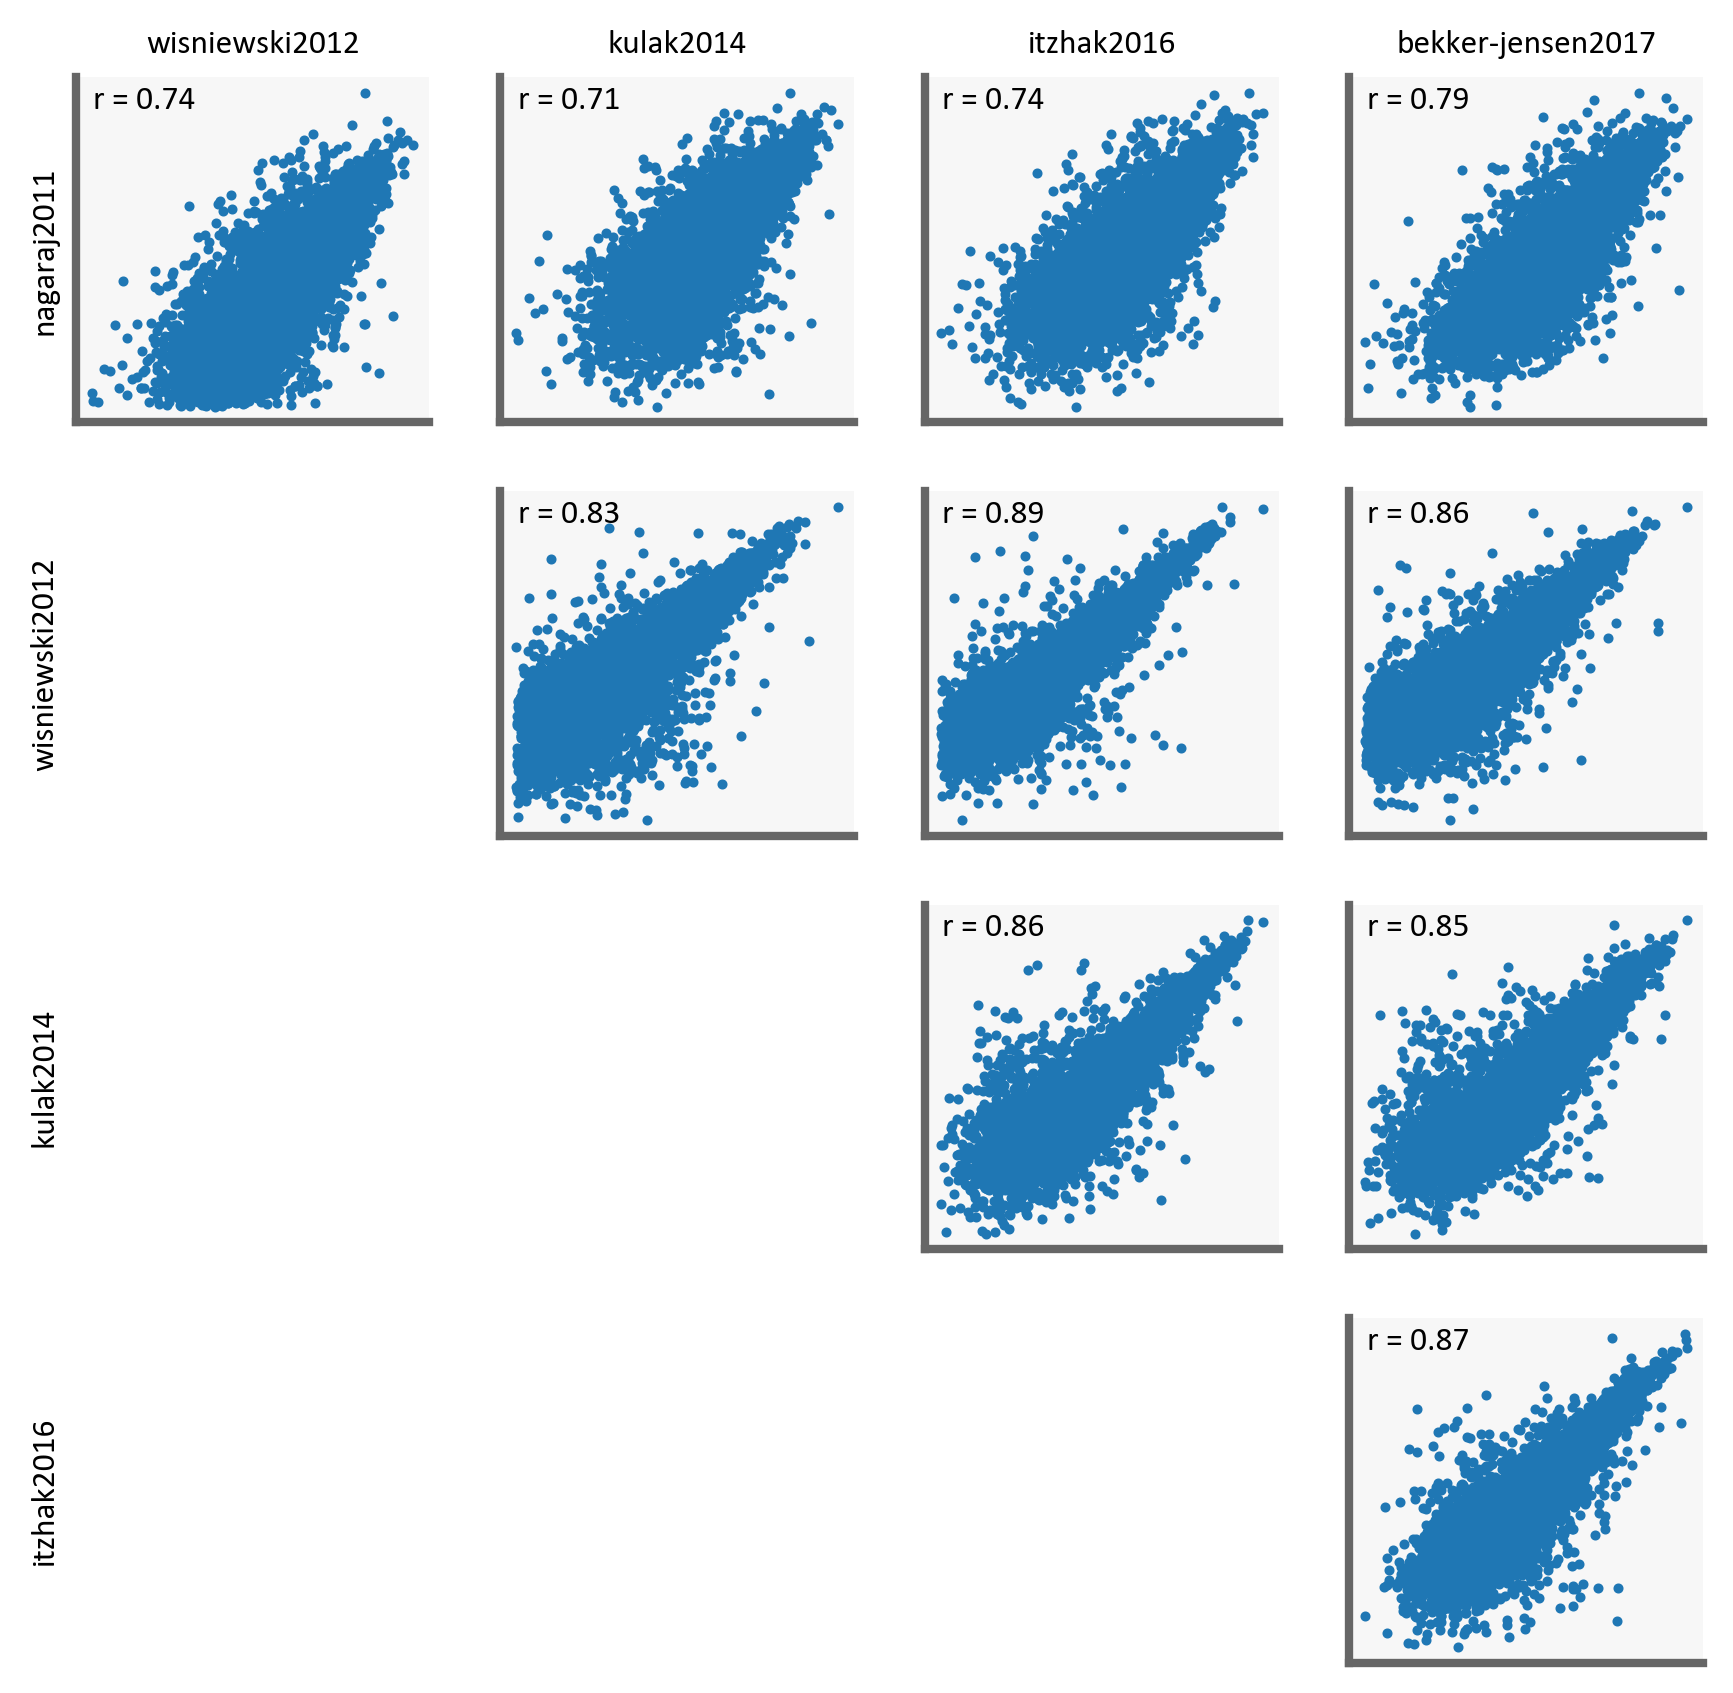

In [11]:
plt.rc('font', size=8)
fig, axs = plt.subplots(nrows=len(articles_data)-1, ncols=len(articles_data)-1, figsize=(7,7))
plt.grid('False')
for i in range(0, len(articles_data)-1):
    for j in range(0, len(articles_data)-1):
        if i > j:
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            axs[i][j].set_facecolor('1')
            axs[i][j].spines['bottom'].set_visible(False)
            axs[i][j].spines['left'].set_visible(False)
        
        if i <= j:
            inter = set.intersection(set(articles_data[i]['Entry']), set(articles_data[j]['Entry']))
            d1 = np.log(articles_data[i][articles_data[i]['Entry'].isin(inter)].drop_duplicates('Entry').set_index('Entry')['C [Copies/cell]'])
            #d1c = np.log(articles_data[i][articles_data[i]['Entry'].isin(core_proteins)].drop_duplicates('Entry').set_index('Entry')['C [Copies/cell]'])
            d2 = np.log(articles_data[j+1][articles_data[j+1]['Entry'].isin(inter)].drop_duplicates('Entry').set_index('Entry')['C [Copies/cell]'])
            #d2c = np.log(articles_data[j+1][articles_data[j+1]['Entry'].isin(core_proteins)].drop_duplicates('Entry').set_index('Entry')['C [Copies/cell]'])
            dd = pd.concat([d1, d2], axis=1).dropna()
            #ddc = pd.concat([d1c, d2c], axis=1).dropna()
            
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            axs[i][j].scatter(dd.iloc[:,-2], dd.iloc[:,-1], s=2, color='C0')
            #axs[i][j].scatter(ddc.iloc[:,-2], ddc.iloc[:,-1], s=2, color='C1')
            axs[i][j].text(0.05, 0.91, 'r = {:.2f}'.format(round(pearsonr(dd.iloc[:,-2], dd.iloc[:,-1])[0],2)), transform = axs[i][j].transAxes)
        if i == 0:
            axs[i][j].set_title(articles_names[j+1], size=8)
            
        if j == 0:
            axs[i][j].set_ylabel(articles_names[i])
            
plt.savefig('../graphs/hela_correlations.png')

In [13]:
mass_avg = []
for i in articles_data:
    i['Mass'] = i['Entry'].map(db_human.set_index('Entry')['Mass'])
    mass_avg.append((i['C [Copies/cell]']*i['Mass']).sum()/i['C [Copies/cell]'].sum())
    
mass_avg

[30360.801524398346,
 40246.46555111307,
 40120.94860477102,
 40931.13726198581,
 40900.7183545008]

In [15]:
mass_total = []
for i in articles_data:
    i['Mass'] = i['Entry'].map(db_human.set_index('Entry')['Mass'])
    mass_total.append((i['C [Copies/cell]']*i['Mass']).sum())
    
mass_total2 = [i*1.66054e-12 for i in mass_total]

mass_total

[59521686254384.36,
 326017667571882.5,
 117546948082962.72,
 317662036666142.0,
 163929724730510.03]

In [16]:
mass_total2

[98.83814089285539,
 541.3653777098137,
 195.1914091696829,
 527.4905183655954,
 272.2118651040011]

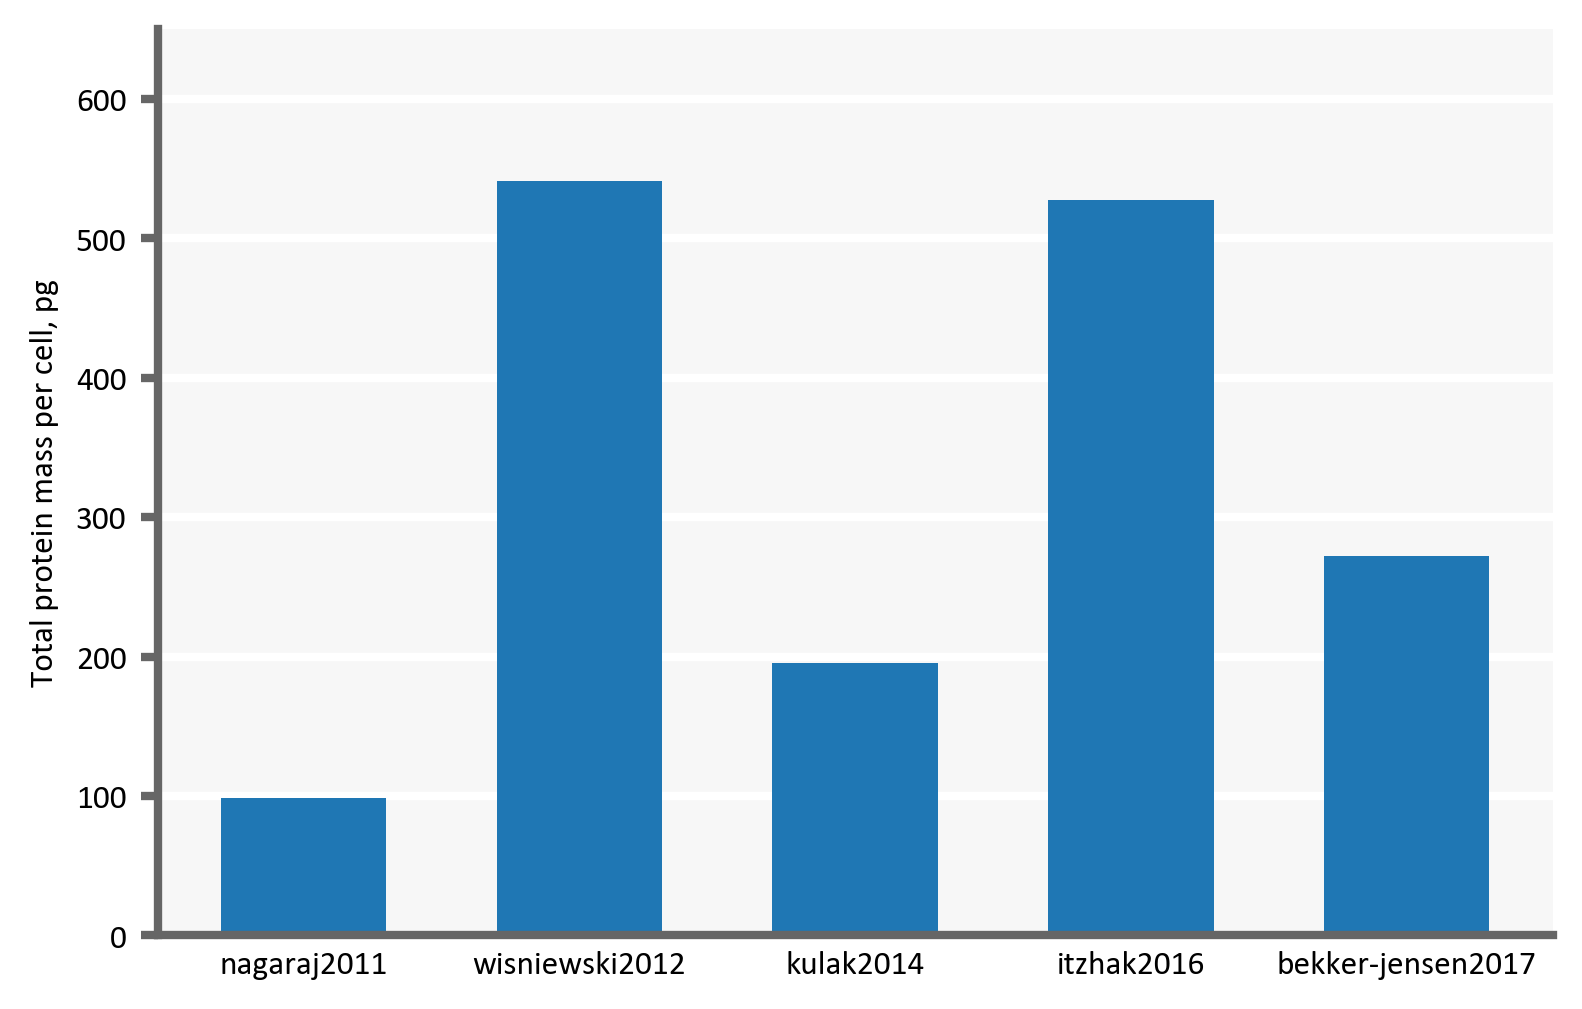

In [19]:
fig, ax = plt.subplots(figsize=(6,4))

ax.set(xticks = range(len(articles_data)),
       xticklabels = articles_names,
       ylabel = 'Total protein mass per cell, pg',
       ylim = [0, 650])

ax.bar(range(len(articles_data)), 
       height = mass_total, 
       color = 'C0',
       width = 0.6)

plt.savefig('../graphs/hela_total_mass_per_cell.png')

In [23]:
milo = [0.115*6*10**11/i*2800 for i in mass_avg]
milo

[6363468363.796058,
 4800421536.510721,
 4815439482.829811,
 4720122941.207198,
 4723633417.033612]

In [34]:
milo_per_um = [i/2800 for i in milo]
milo_per_um

[2272667.272784306,
 1714436.2630395433,
 1719799.815296361,
 1685758.193288285,
 1687011.9346548615]

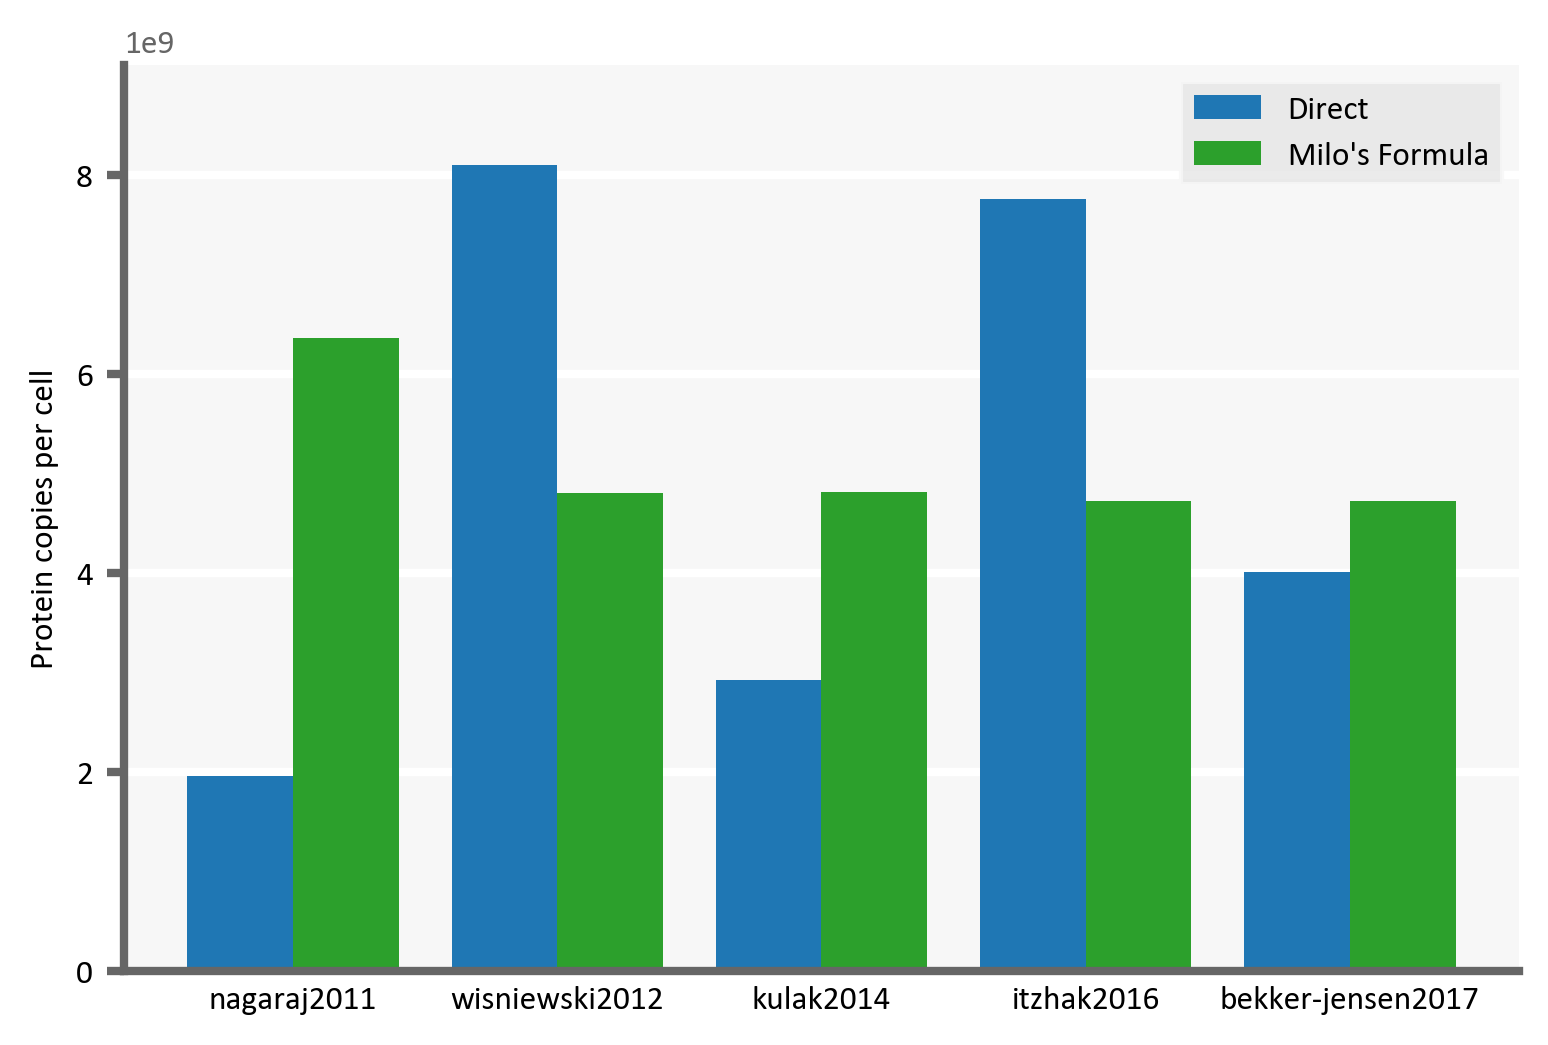

In [37]:
fig, ax = plt.subplots(figsize=(6,4))

ax.set(xticks = range(len(articles_data)),
       xticklabels = articles_names,
       ylabel = 'Protein copies per cell',
       ylim = [0,9.1e+9])

ax.bar(np.linspace(0, len(articles_data)-1, 5)-0.2, 
       height = [i['C [Copies/cell]'].sum() for i in articles_data], 
       color = 'C0',
       width = 0.4,
       label = 'Direct')

ax.bar(np.linspace(0, len(articles_data)-1, 5)+0.2, 
       height = milo, 
       color = 'C2',
       width = 0.4,
       label = 'Milo\'s Formula')

ax.legend()

plt.savefig('../graphs/hela_direct_vs_milo.png')

In [40]:
db_human.head()

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Ribosomal
0,Q96NG5,ZN558_HUMAN,reviewed,Zinc finger protein 558,ZNF558,Homo sapiens (Human),402,False
1,Q6ZN19,ZN841_HUMAN,reviewed,Zinc finger protein 841,ZNF841,Homo sapiens (Human),808,False
2,Q9UI25,YP002_HUMAN,reviewed,Putative uncharacterized protein PRO0461,PRO0461,Homo sapiens (Human),63,False
3,Q86XN6,ZN761_HUMAN,reviewed,Zinc finger protein 761,ZNF761 KIAA2033,Homo sapiens (Human),746,False
4,A8MUZ8,Z705G_HUMAN,reviewed,Putative zinc finger protein 705G,ZNF705G,Homo sapiens (Human),300,False


In [50]:
ribo_quants = [i[i['Entry'].isin(db_human[db_human['Ribosomal'] == True]['Entry'].to_list())]['C [Copies/cell]'].to_numpy() for i in articles_data]
ribo_quants = [i[i != 0.0] for i in ribo_quants]

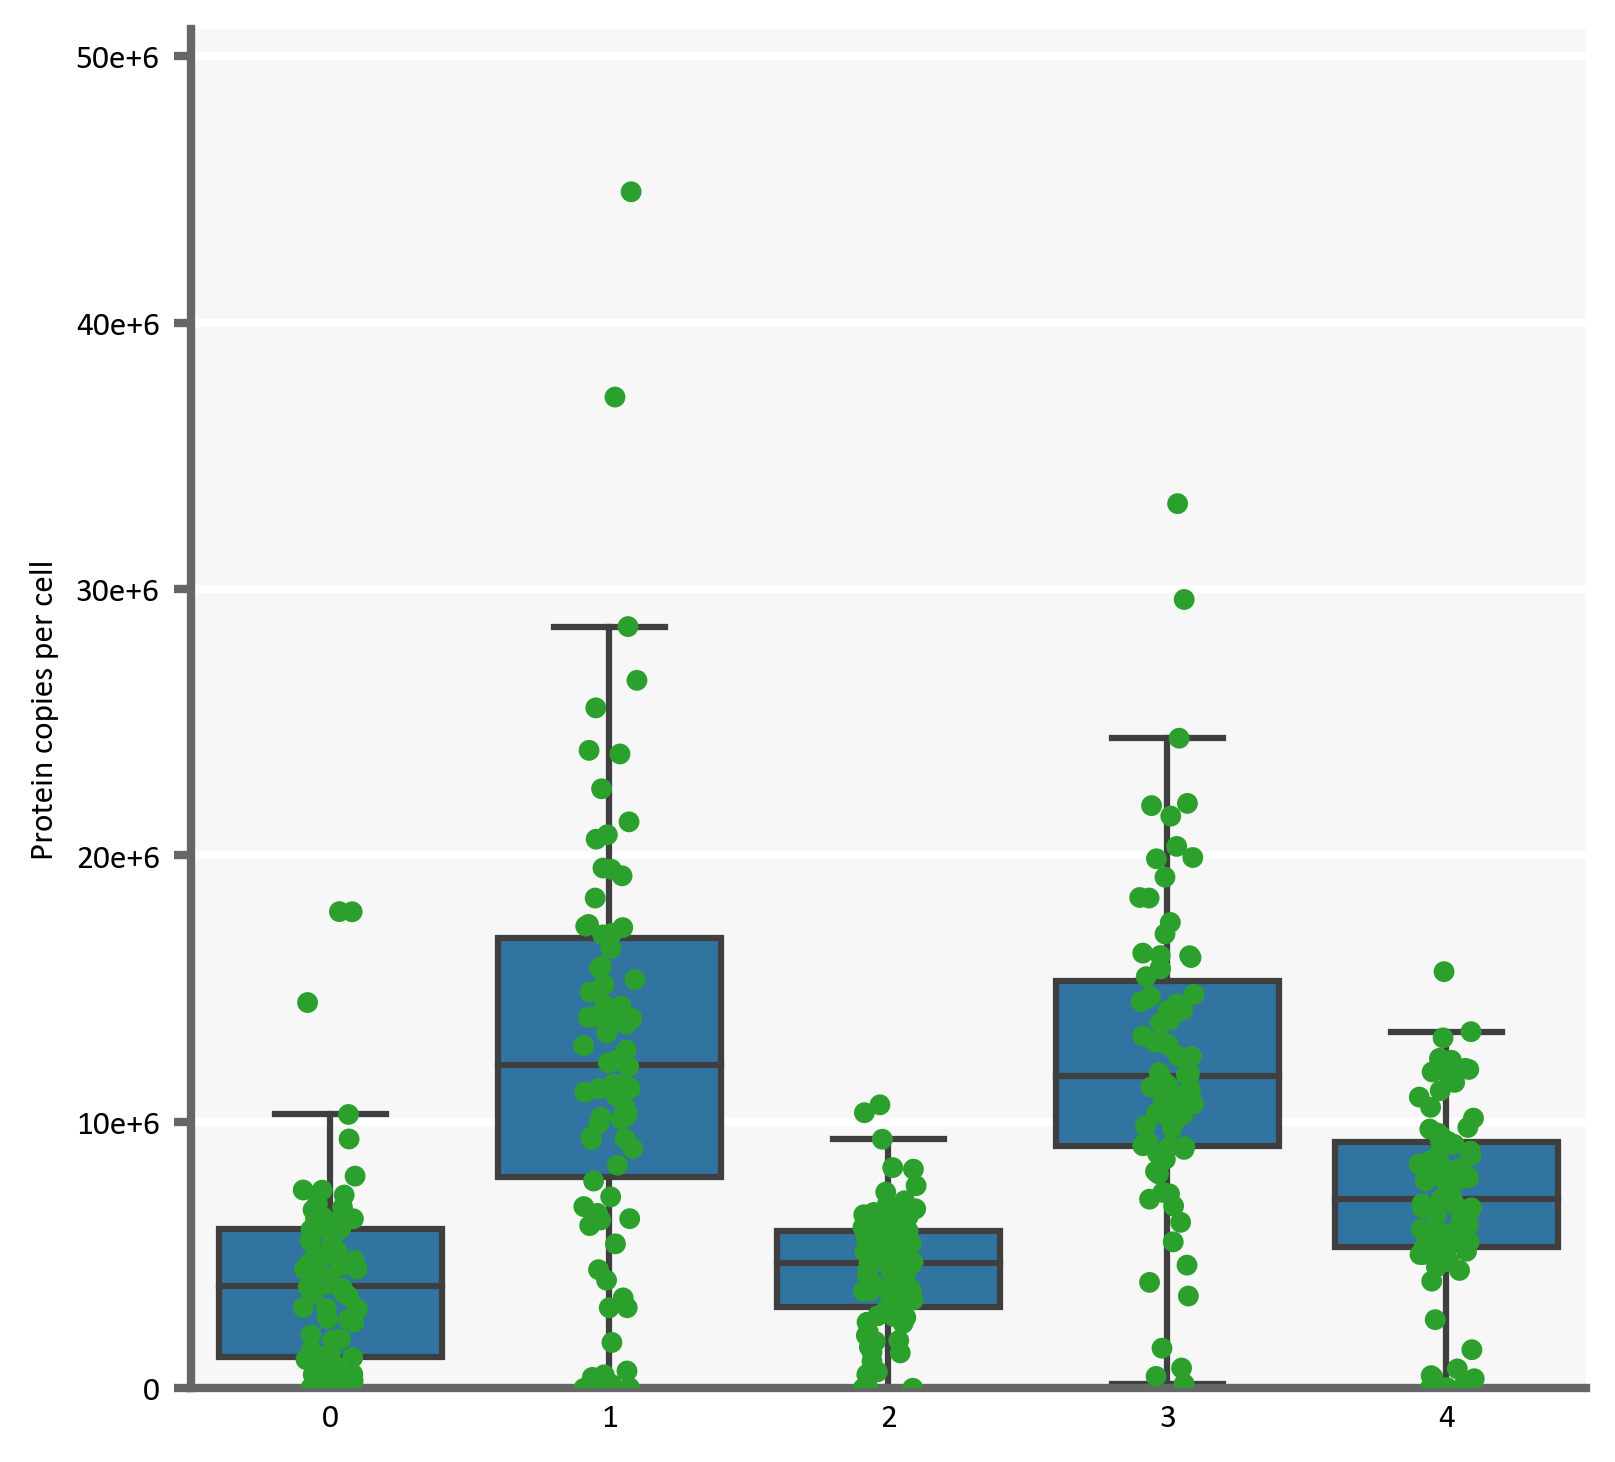

In [58]:
plt.figure(figsize=(6,6))
plt.ylabel('Protein copies per cell')
sn.boxplot(data=ribo_quants, color='C0', fliersize = 0)
sn.stripplot(data=ribo_quants, color='C2')
plt.ylim([0,5e+7+1000000])
plt.yticks([0, 10e+6, 20e+6, 30e+6, 40e+6, 50e+6], ['0', '10e+6', '20e+6', '30e+6', '40e+6', '50e+6'])
plt.savefig('../graphs/hela_ribosomal_dist.png')